In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f560aea4c884fb8593748eda08bb57f


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | raga
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | ipswich
Processing Record 7 of Set 1 | maltahohe
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | requena
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | hay river
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 of Set 1 | hobart
Processing Record 2

Processing Record 36 of Set 4 | villa sandino
Processing Record 37 of Set 4 | smithers
Processing Record 38 of Set 4 | upernavik
Processing Record 39 of Set 4 | agadez
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | caibarien
Processing Record 46 of Set 4 | nizwa
Processing Record 47 of Set 4 | zapolyarnyy
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | joensuu
Processing Record 2 of Set 5 | camana
Processing Record 3 of Set 5 | kieta
Processing Record 4 of Set 5 | si bun ruang
Processing Record 5 of Set 5 | lehututu
Processing Record 6 of Set 5 | gamba
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | boueni
Processing Record 9 of Set 5 | pendleton
Processi

Processing Record 22 of Set 8 | alakurtti
Processing Record 23 of Set 8 | coahuayana
Processing Record 24 of Set 8 | ancud
Processing Record 25 of Set 8 | nanortalik
Processing Record 26 of Set 8 | ponta delgada
Processing Record 27 of Set 8 | aginskoye
Processing Record 28 of Set 8 | quelimane
Processing Record 29 of Set 8 | burnie
Processing Record 30 of Set 8 | santa rosalia
Processing Record 31 of Set 8 | toumodi
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | nacala
Processing Record 34 of Set 8 | patacamaya
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | bonavista
Processing Record 37 of Set 8 | puerto madero
Processing Record 38 of Set 8 | lahan
Processing Record 39 of Set 8 | sambava
Processing Record 40 of Set 8 | tornio
Processing Record 41 of Set 8 | sovetskiy
Processing Record 42 of Set 8 | kalabo
Processing Record 43 of Set 8 | cascavel
Processing Record 44 of Set 8 | honolulu
Processing Record 45 of Set 8 | tete
Processing Rec

Processing Record 11 of Set 12 | kailua
Processing Record 12 of Set 12 | birin
Processing Record 13 of Set 12 | hit
Processing Record 14 of Set 12 | mirnyy
Processing Record 15 of Set 12 | mutare
Processing Record 16 of Set 12 | praya
Processing Record 17 of Set 12 | san angelo
Processing Record 18 of Set 12 | pilibanga
Processing Record 19 of Set 12 | oltu
Processing Record 20 of Set 12 | oroszlany
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | yelizovo
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | tema
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | codrington
Processing Record 27 of Set 12 | maroantsetra
Processing Record 28 of Set 12 | wattegama
Processing Record 29 of Set 12 | satitoa
City not found. Skipping...
Processing Record 30 of Set 12 | bukachacha
Processing Record 31 of Set 12 | payakumbuh
Processing Record 32 of Set 12 | thap than
Processing Record 33 of Set 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hamilton,39.1834,-84.5333,36.00,48,75,12.66,US,2021-01-30 19:43:21
1,Busselton,-33.6500,115.3333,64.00,74,0,1.99,AU,2021-01-30 19:43:41
2,Raga,8.4596,25.6780,72.86,21,0,5.64,SS,2021-01-30 19:43:41
3,Vila Velha,-20.3297,-40.2925,86.00,62,0,19.57,BR,2021-01-30 19:43:41
4,Hilo,19.7297,-155.0900,71.60,83,90,9.22,US,2021-01-30 19:43:42
5,Ipswich,52.0592,1.1555,39.99,81,75,17.27,GB,2021-01-30 19:41:12
6,Maltahohe,-24.8333,16.9833,79.66,16,0,6.62,NA,2021-01-30 19:43:42
7,Sao Filipe,14.8961,-24.4956,75.79,58,95,9.08,CV,2021-01-30 19:43:42
8,Ust-Nera,64.5667,143.2000,-22.95,77,100,7.23,RU,2021-01-30 19:43:42
9,Requena,39.4883,-1.1004,59.00,68,13,26.04,ES,2021-01-30 19:43:42


In [20]:
new_column_order = ["City","Country","Date","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Date,Date,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2021-01-30 19:43:21,2021-01-30 19:43:21,2021-01-30 19:43:21,2021-01-30 19:43:21,39.1834,-84.5333,36.00,48,75,12.66
1,Busselton,AU,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,-33.6500,115.3333,64.00,74,0,1.99
2,Raga,SS,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,8.4596,25.6780,72.86,21,0,5.64
3,Vila Velha,BR,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,2021-01-30 19:43:41,-20.3297,-40.2925,86.00,62,0,19.57
4,Hilo,US,2021-01-30 19:43:42,2021-01-30 19:43:42,2021-01-30 19:43:42,2021-01-30 19:43:42,19.7297,-155.0900,71.60,83,90,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...
540,Vanimo,PG,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,-2.6741,141.3028,78.35,83,100,7.05
541,Kamenka,RU,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,51.3223,42.7678,34.00,96,100,12.37
542,Ashington,GB,2021-01-30 19:40:15,2021-01-30 19:40:15,2021-01-30 19:40:15,2021-01-30 19:40:15,50.9331,-0.3909,39.99,3,100,5.01
543,Lerwick,GB,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,2021-01-30 19:45:08,60.1545,-1.1494,35.60,75,40,6.91


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

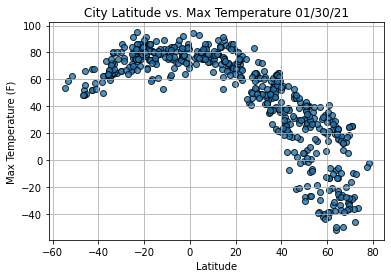

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

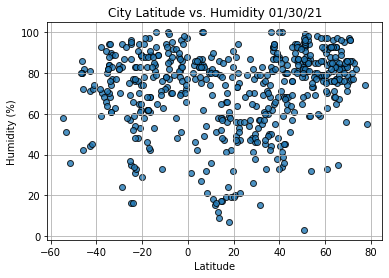

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

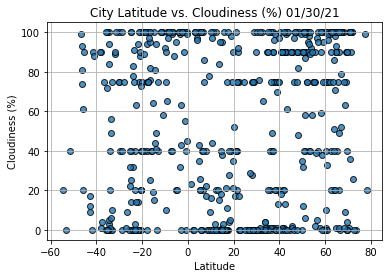

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

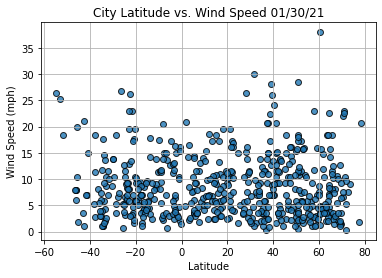

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()